In [3]:
import numpy as np
from astropy.io import fits 
import pandas as pd
import matplotlib.pylab as plt
from astropy import units as u

from ez_spectral_analysis import *

# new packages
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

In [44]:
def continuum_norm(path, plot=False, median_window=3, orders=None):
  """
  normalize the continuum of spectra

    Opens fits files, cycles through each wavelength order (or the user-specified orders) and normalizes the continuum using specutils

    Args:
        path (str): string. Specified path of where a spectrum is located
        plot (bool): boolean. If True, plots will be generated. Default is False
        orders (array): array. array of wavelength orders to be normalized. If not specified, all wavelength orders will be used.
        median_window (int): integer. Needs to be an odd integer. The width of the median smoothing kernel used to filter the data before fitting the continuum.

    Returns:
        arrays: wavelength array, normalized flux array
  """

  wavelengths, fluxes =spectra_read(path=path)

  norm_fluxes = []
  
  if orders == None:
    for order in range(0, len(fluxes)):
      spectrum = Spectrum1D(flux=fluxes[order].astype(np.float64)*u.Jy, 
                            spectral_axis=wavelengths[order].astype(np.float64)/10*u.nm)
      continuum_g_x = fit_generic_continuum(spectrum, median_window=median_window)
      y_continuum_fitted = continuum_g_x(wavelengths[order]/10*u.nm)

      spec_normalized = spectrum / y_continuum_fitted
      norm_fluxes.append(spec_normalized.flux)

      if plot:
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        ax = axes[0]  
        ax.plot(wavelengths[order]/10*u.nm, fluxes[order]*u.Jy, color='purple')  
        ax.plot(wavelengths[order]/10*u.nm, y_continuum_fitted)  
        ax.set_title("Continuum Fitting")

        ax = axes[1]
        ax.plot(spec_normalized.spectral_axis, spec_normalized.flux, color='purple')    
        ax.set_title("Continuum normalized spectrum")
  else:
    for order in orders:
      spectrum = Spectrum1D(flux=fluxes[order].astype(np.float64)*u.Jy, 
                            spectral_axis=wavelengths[order].astype(np.float64)/10*u.nm)
      continuum_g_x = fit_generic_continuum(spectrum, median_window=median_window)
      y_continuum_fitted = continuum_g_x(wavelengths[order]/10*u.nm)

      spec_normalized = spectrum / y_continuum_fitted
      norm_fluxes.append(spec_normalized.flux)

      if plot:
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        ax = axes[0]  
        ax.plot(wavelengths[order]/10*u.nm, fluxes[order]*u.Jy, color='purple')  
        ax.plot(wavelengths[order]/10*u.nm, y_continuum_fitted)  
        ax.set_title("Continuum Fitting")

        ax = axes[1]
        ax.plot(spec_normalized.spectral_axis, spec_normalized.flux, color='purple')    
        ax.set_title("Continuum normalized spectrum")    

  return wavelengths.astype(np.float64), norm_fluxes        
         

      

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


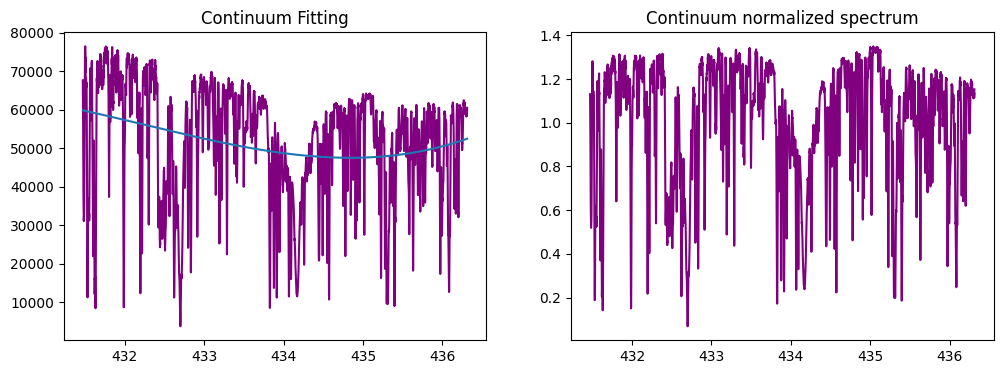

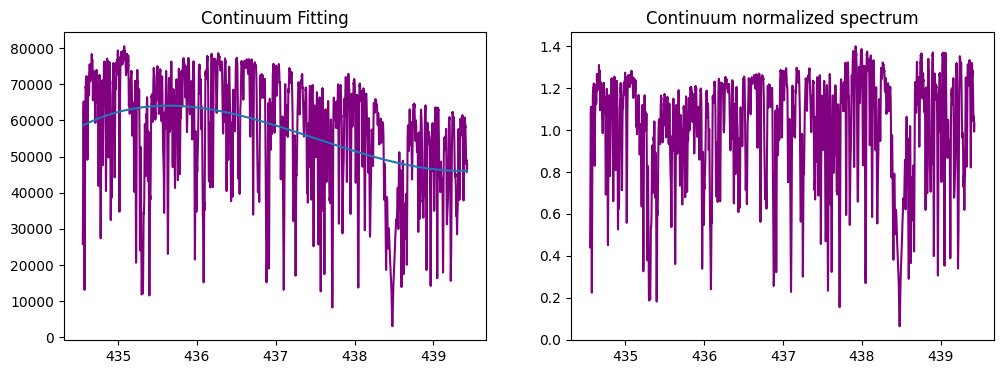

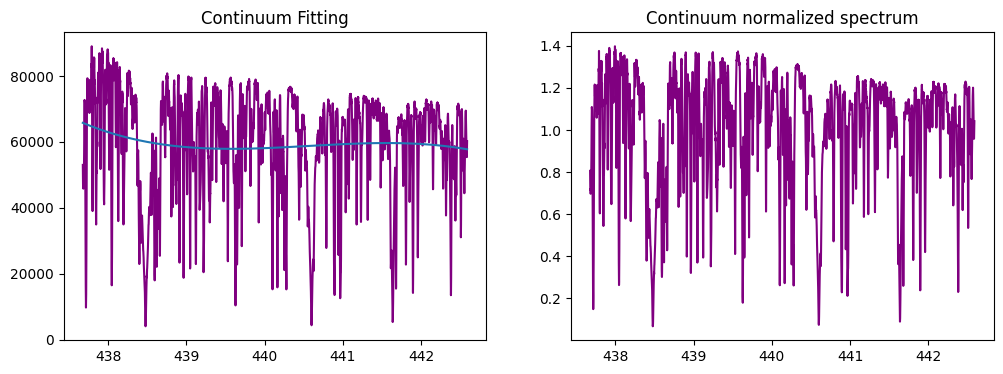

In [53]:
wl, flux = continuum_norm(path='data/s2d/r.HARPN.2015-07-29T09-28-46.751_S2D_A.fits', 
                          plot=True, median_window=1, orders=[16,17, 18])

In [46]:
wl, flux

(array([[3875.16291003, 3875.1752115 , 3875.18751214, ..., 3918.54605433,
         3918.5549398 , 3918.56382443],
        [3899.99187738, 3900.00426053, 3900.01664284, ..., 3943.65967242,
         3943.66861605, 3943.67755883],
        [3925.14343107, 3925.15589503, 3925.16835815, ..., 3969.0972346 ,
         3969.10623676, 3969.11523807],
        ...,
        [6684.17397492, 6684.19531649, 6684.21665662, ..., 6759.43754893,
         6759.45297437, 6759.46839836],
        [6758.41013645, 6758.43171275, 6758.45328759, ..., 6834.50965904,
         6834.52525611, 6834.54085171],
        [6834.31222017, 6834.33403902, 6834.3558564 , ..., 6911.26805182,
         6911.28382526, 6911.29959723]]),
 [<Quantity [1.13070553, 1.07293682, 1.00183305, ..., 1.11432343, 1.13670031,
             1.15302826]>,
  <Quantity [0.44074499, 0.50599633, 0.61648823, ..., 1.00296043, 1.00479578,
             1.03317703]>,
  <Quantity [0.80605746, 0.76923953, 0.71565586, ..., 0.99615886, 1.01596796,
             